# Análise de Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados

Projeto de análise de vendas de medicamentos controlados e antimicrobianos exclusivamente industrializados na Região Metropolitana da Baixada Santista (RMBS) composta por nove municípios no litoral do estado de São Paulo, através de dados extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) e disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa). Através da análise das informações de vendas, dados geográricos, perfil de pacientes e características de medicamentos, aplicando a metodologia CRISP-DM, o objetivo é extrair insights de negócios, sugerir soluções aos problemas identificados e apresentar propostas de aprimoramento.

## Demanda do negócio

A análise dos dados possibilitará a obtenção de insigths, a identificação de tendências e a proposição de soluções estratégicas. Além disso, esse processo permitirá direcionar recursos de forma mais eficaz para áreas de maior demanda, aprimorando, assim, a gestão logística e o controle de estoque. Para atender a esses objetivos, foi definida as seguintes demandas de negócio:

- Compreender as tendências, padrões e características das vendas farmacêuticas.
- Construção de perfis de pacientes com base nos mendicamentos receitados.
- Compreender a demanda de medicamentos com base no perfil dos pacientes, por tempo e por município.
- Obter insights, identificar oportunidades e propor soluções a problemas.
- Elaboração de painel de informações de medicamentos baseado em filtros.

## Compreensão dos dados

Os dados que serão utilizados na análise compreendem o período de uma ano, outubro de 2020 até setembro de 2021, que integram um conjunto de doze arquivos em formato "CSV". Os dados foram extraídos do Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC), provenientes apenas de farmácias e drogarias privadas que periodicamente devem enviar os dados a respeito de todas as vendas realizadas de medicamentos sujeitos à escrituração no SNGPC. Os dados foram disponibilizados no [portal de dados abertos](https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados) da Agência Nacional de Vigilância Sanitária (Anvisa).

## Tópicos da análise

- Construção de perfil de pacientes.
- Distribuição de pacientes por município.
- Demanda de medicamentos por paciente.
- Demanda de medicamentos por município.
- Demanda de medicamentos durante o ano.

## Dicionário de dados

**ANO_VENDA:** Ano da venda do medicamento.<br>
**MES_VENDA:** Mês da venda do medicamento.<br>
**UF_VENDA:** Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.<br>
**MUNICIPIO_VENDA:** Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.<br>
**PRINCIPIO_ATIVO:** Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa.<br>Quando um medicamento tem mais de um princípio ativo, cada um deles é separado pelo caractere “+”.<br>Ex.: “PRINCÍPIO ATIVO 1 + PRINCÍPIO ATIVO 2”<br>
**DESCRICAO_APRESENTACAO:** Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem. Exemplo: Medicamento X, pode ter duas apresentações diferentes:<br>• Apresentação 1:<br>Uma caixa com 1 blister de alumínio com 20 comprimidos, cada comprimido com 5 mg de princípio ativo.<br>Nesse caso, a descrição da apresentação seria:<br>“5 MG COM CT BL AL X 20”<br>• Apresentação 2:<br>Uma caixa com 1 frasco de vidro com 50 mL de um xarope, com concentração do princípio ativo de 15 mg por mL.<br>Nesse caso, a descrição da apresentação seria:<br>15MG/ML XPE CT FR VD x 50 ML<br>Esses exemplos representam descrições de apresentações diferentes para um mesmo medicamento.<br>Os termos utilizados na descrição das apresentações seguem o disposto no Vocabulário Controlado da Anvisa, disponível no link:<br>[http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75](http://portal.anvisa.gov.br/documents/33836/2501339/Vocabul%C3%A1rio+Controlado/fd8fdf08-45dc-402a-8dcf-fbb3fd21ca75)<br>
**QTD_VENDIDA:** Quantidade vendida de caixas ou frascos do medicamento.<br>
**UNIDADE_MEDIDA:** Indica se a quantidade vendida do medicamento foi de caixas ou frascos.<br>
**CONSELHO_PRESCRITOR:** Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**UF_CONSELHO_PRESCRITOR:** Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.<br>
**TIPO_RECEITUARIO:** Tipo de receituário utilizado na prescrição.<br>Valores e respectivos tipos de receituário:<br>1 – Receita de Controle Especial em 2 vias (Receita Branca);<br>2 – Notificação de Receita B (Notificação Azul);<br>3 – Notificação de Receita Especial (Notificação Branca);<br>4 – Notificação de Receita A (Notificação Amarela);<br>5 – Receita Antimicrobiano em 2 vias.<br>
**CID10:** Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).<br>
**SEXO:** Sexo do paciente (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para o sexo masculino, valor 2 para o sexo feminino.<br>
**IDADE:** Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>
**UNIDADE_IDADE:** Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos antimicrobianos).<br>Valor 1 para unidade de medida em anos, valor 2 para unidade de medida em meses.<br>

## Sumário

-------------------------------------


## 1. Importação de bibliotecas

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import gc
import funcoes as fn

from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## 2. Carregamento dos dados

In [2]:
# Efetuando a limpeza de memória antes do carregamento dos dados
gc.collect()

# Caminho do arquivo de dados
caminho = 'dados/ABT/00/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df = pd.read_parquet(caminho, engine='pyarrow')


## 3. Análise do dataframe

In [3]:
# Informações do dataframe como nome das colunas, contagem de
# de dados, tipo de dados e quantidade de memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736196 entries, 0 to 736195
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ANO_VENDA               736196 non-null  int32   
 1   MES_VENDA               736196 non-null  int32   
 2   UF_VENDA                736196 non-null  object  
 3   MUNICIPIO_VENDA         736196 non-null  object  
 4   PRINCIPIO_ATIVO         735816 non-null  object  
 5   DESCRICAO_APRESENTACAO  736196 non-null  object  
 6   QTD_VENDIDA             736196 non-null  int32   
 7   UNIDADE_MEDIDA          736196 non-null  object  
 8   CONSELHO_PRESCRITOR     736196 non-null  object  
 9   UF_CONSELHO_PRESCRITOR  736196 non-null  object  
 10  TIPO_RECEITUARIO        736196 non-null  object  
 11  CID10                   49 non-null      object  
 12  SEXO                    615105 non-null  float64 
 13  IDADE                   615105 non-null  float64 
 14  UNID

In [4]:
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'\nQuantidade de colunas (variáveis): {df.shape[1]}')



Quantidade de linhas (registros):  736196

Quantidade de colunas (variáveis): 17


In [5]:
# Agrupar os dados por ano/mês e exibir a quantidade de registros
df_ano_mes = df.groupby(['ANO_VENDA', 'MES_VENDA']).size()
df_ano_mes = pd.DataFrame(df_ano_mes)
df_ano_mes.rename(columns={0: 'QTDE'}, inplace=True)
df_ano_mes['%'] = df_ano_mes['QTDE']/df_ano_mes['QTDE'].sum()*100

df_ano_mes


QTDE         %
ANO_VENDA MES_VENDA                 
2020      10         61346  8.332835
          11         61844  8.400480
          12         63109  8.572310
2021      1          65856  8.945444
          2          59813  8.124603
          3          66270  9.001679
          4          56797  7.714929
          5          59675  8.105858
          6          59026  8.017702
          7          60118  8.166032
          8          60468  8.213574
          9          61874  8.404555

In [6]:
# Primeiras linhas do dataframe

df.head()


,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
0,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,69.0,1.0,2023-10-25,2020-10-01
1,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,73.0,1.0,2023-10-25,2020-10-01
2,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,1.0,78.0,1.0,2023-10-25,2020-10-01
3,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,18.0,1.0,2023-10-25,2020-10-01
4,2020,10,SP,MONGAGUÁ,ACETATO DE PREDNISOLONA + GATIFLOXACINO SESQUI...,3 MG/ML + 10 MG/ML SUS OFT CT FR GOT PLAS OPC ...,1,CAIXA,CRM,SP,5,None,2.0,38.0,1.0,2023-10-25,2020-10-01


In [7]:
# Últimas linhas do dataframe

df.tail()


,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
736191,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,6,FRASCO,CRMV,SP,5,None,NaN,NaN,NaN,2023-10-25,2021-09-01
736192,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,35.0,1.0,2023-10-25,2021-09-01
736193,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,3,FRASCO,CRO,SP,5,None,2.0,45.0,1.0,2023-10-25,2021-09-01
736194,2021,9,SP,SANTOS,None,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,1,FRASCO,CRO,SP,5,None,2.0,91.0,1.0,2023-10-25,2021-09-01
736195,2021,9,SP,SANTOS,None,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,1,CAIXA,CRM,SP,5,None,1.0,22.0,1.0,2023-10-25,2021-09-01


In [9]:
fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,ANO_VENDA,int32,0,0.00,2
1,MES_VENDA,int32,0,0.00,12
2,UF_VENDA,object,0,0.00,1
3,MUNICIPIO_VENDA,object,0,0.00,9
4,PRINCIPIO_ATIVO,object,380,0.05,293
5,DESCRICAO_APRESENTACAO,object,0,0.00,1915
6,QTD_VENDIDA,int32,0,0.00,757
7,UNIDADE_MEDIDA,object,0,0.00,2
8,CONSELHO_PRESCRITOR,object,0,0.00,4
9,UF_CONSELHO_PRESCRITOR,object,0,0.00,27


## 4. Limpeza e pré-processamento dos dados

### 1. Análise e tratamento de registros duplicados

In [ ]:
df.duplicated(keep='first').value_counts().to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,736196


### 2. Análise e tratamento de valores nulos

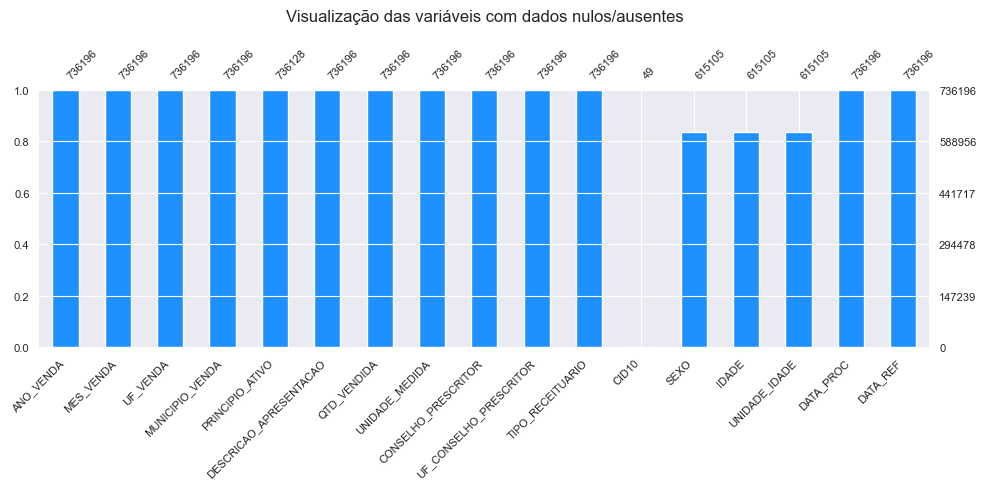

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
msno.bar(df, color='dodgerblue', fontsize=8, ax=ax)
plt.title('Visualização das variáveis com dados nulos/ausentes\n')
plt.tight_layout()


In [10]:
df_nulls = df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
df_nulls = fn.exibe_valores_unicos(df_nulls[['DESCRICAO_APRESENTACAO']]).T
df_nulls=df_nulls.reset_index()
df_nulls


,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM REV CT BL AL/AL X 30,29
1,10 MG COM REV CT BL AL/AL X 60,13
2,2 MG COM CT 2 BL AL PLAS INC X 15,1
3,20 MG COM REV CT BL AL/AL X 30,5
4,250 MG COM REV CT 5 BL AL/AL X 2,1
5,3 MG/ML SOL OFT CT FR PLAS OPC GOT X 5 ML,183
6,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",15
7,50 MG COM CX 2 BL AL PLAS INC X 15,5
8,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,8
9,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,3


In [11]:
arr = np.unique(df_nulls['DESCRICAO_APRESENTACAO'])
for a in arr:
    try:
        df_t = df[df['DESCRICAO_APRESENTACAO'] == a]
        moda_principio_ativo = df_t['PRINCIPIO_ATIVO'].mode()[0]
        df.loc[(df['DESCRICAO_APRESENTACAO'] == a) & (
            df['PRINCIPIO_ATIVO'].isnull()), 'PRINCIPIO_ATIVO'] = moda_principio_ativo
    except:
        print(f'Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: {a}')


Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 10 MG COM REV CT BL AL/AL X 60
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 2 MG COM CT 2 BL AL PLAS INC X 15
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 20 MG COM REV CT BL AL/AL X 30
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 250 MG COM REV CT 5 BL AL/AL X 2
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 50 MG COM CX 2 BL AL PLAS INC X 15
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 500 MG COM REV CT 2 BL AL PVDC LEIT X 7
Não há PRINCIPIO_ATIVO compatível com DESCRICAO_APRESENTACAO: 500 MG COM REV CT FR PLAS OPC X 14


In [12]:
df_nulls = df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
df_nulls = fn.exibe_valores_unicos(df_nulls[['DESCRICAO_APRESENTACAO']]).T
df_nulls = df_nulls.reset_index()
df_nulls


,DESCRICAO_APRESENTACAO,Quantidade
0,10 MG COM REV CT BL AL/AL X 60,13
1,2 MG COM CT 2 BL AL PLAS INC X 15,1
2,20 MG COM REV CT BL AL/AL X 30,5
3,250 MG COM REV CT 5 BL AL/AL X 2,1
4,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",15
5,50 MG COM CX 2 BL AL PLAS INC X 15,5
6,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,8
7,500 MG COM REV CT 2 BL AL PVDC LEIT X 7,3
8,500 MG COM REV CT FR PLAS OPC X 14,17


In [13]:
df_nulls = df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
df_nulls

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE,DATA_PROC,DATA_REF
35075,2020,10,SP,SANTOS,None,10 MG COM REV CT BL AL/AL X 60,1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2020-10-01
35082,2020,10,SP,SANTOS,None,500 MG CAP GEL DURA CT 2 BL AL PLAS INC X 4,2,CAIXA,CRM,SP,5,None,2.0,28.0,1.0,2023-10-25,2020-10-01
48356,2020,10,SP,SÃO VICENTE,None,500 MG COM REV CT FR PLAS OPC X 14,1,CAIXA,CRM,SP,5,None,1.0,49.0,1.0,2023-10-25,2020-10-01
61060,2020,10,SP,PERUÍBE,None,"37,5 MG CAP GEL DURA LIB PROL CT BL PLAS OPC X 30",1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2020-10-01
64690,2020,11,SP,ITANHAÉM,None,10 MG COM REV CT BL AL/AL X 60,1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689024,2021,9,SP,SÃO VICENTE,None,500 MG COM REV CT FR PLAS OPC X 14,1,CAIXA,CRM,SP,5,None,1.0,79.0,1.0,2023-10-25,2021-09-01
697278,2021,9,SP,GUARUJÁ,None,20 MG COM REV CT BL AL/AL X 30,1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2021-09-01
711272,2021,9,SP,PRAIA GRANDE,None,20 MG COM REV CT BL AL/AL X 30,1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2021-09-01
736184,2021,9,SP,SANTOS,None,10 MG COM REV CT BL AL/AL X 60,1,CAIXA,CRM,SP,1,None,NaN,NaN,NaN,2023-10-25,2021-09-01


In [14]:
from scipy import stats
teste=df.groupby(['PRINCIPIO_ATIVO','DESCRICAO_APRESENTACAO','UNIDADE_MEDIDA']).size() \
        .reset_index(name='QTDE') \
        .sort_values(by='QTDE', ascending=False)

#teste = df['DESCRICAO_APRESENTACAO'].mode()[0]

#teste['%'] = teste['QTDE']/teste['QTDE'].sum()*100
#teste=stats.mode(teste)
teste

,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,UNIDADE_MEDIDA,QTDE
185,AMOXICILINA TRI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,CAIXA,18492
464,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC OPC X 5,CAIXA,17121
1063,CLORIDRATO DE CIPROFLOXACINO MONOIDRATADO,500 MG COM REV CT BL AL PLAS TRANS X 14,CAIXA,10812
470,AZITROMICINA DI-HIDRATADA,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,CAIXA,10092
1036,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT BL AL PLAS TRANS X 14,CAIXA,9434
...,...,...,...,...
803,CLARITROMICINA,250 MG COM REV CT BL AL PLAS INC X 10,CAIXA,1
804,CLARITROMICINA,250 MG COM REV CT BL AL PLAS INC X 14,CAIXA,1
2215,NORFLOXACINO,400 MG COM REV CT FR PLAS OPC X 14,CAIXA,1
96,AMOXICILINA,50 MG/ML PO SUS OR CT FR PLAS OPC X 150 ML + S...,FRASCO,1


In [ ]:
teste=df[df[['PRINCIPIO_ATIVO']].isnull().any(axis=1)]
teste.to_csv('teste.csv')

###  3. Análise e tratamento de valores únicos

In [15]:
cols = df.columns

for col in cols:
    if df[col].nunique() <= 12:
        data = pd.DataFrame(fn.exibe_valores_unicos(df[col]))
        display(data)


ANO_VENDA,2020,2021
Quantidade,186299,549897


MES_VENDA,1,2,3,4,5,6,7,8,9,10,11,12
Quantidade,65856,59813,66270,56797,59675,59026,60118,60468,61874,61346,61844,63109


UF_VENDA,SP
Quantidade,736196


MUNICIPIO_VENDA,BERTIOGA,CUBATÃO,GUARUJÁ,ITANHAÉM,MONGAGUÁ,PERUÍBE,PRAIA GRANDE,SANTOS,SÃO VICENTE
Quantidade,34645,41304,94778,42737,32739,44902,126257,214327,104507


UNIDADE_MEDIDA,CAIXA,FRASCO
Quantidade,651282,84914


CONSELHO_PRESCRITOR,CRM,CRMV,CRO,RMS
Quantidade,626353,19748,85618,4477


TIPO_RECEITUARIO,1,2,3,4,5
Quantidade,103130,14532,2354,2825,613355


CID10,A04,H600,J390,J852,K031,K113,K630,N340,R769,R827,R938
Quantidade,33,1,3,1,3,3,1,1,1,1,1


SEXO,1.0,2.0
Quantidade,361330,253775


UNIDADE_IDADE,1.0,2.0
Quantidade,604285,10820


DATA_PROC,2023-10-25
Quantidade,736196


DATA_REF,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01
Quantidade,61346,61844,63109,65856,59813,66270,56797,59675,59026,60118,60468,61874
